In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('./mtcars.csv')

# print head: 상단 n개 출력
print('head:\n', df.head(2))

# print tail: 하단 n개 출력
print('tail:\n', df.tail(2))

head:
       Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0      Mazda RX4  21.0    6  160.0  110   3.9  2.620  16.46   0   1     4   
1  Mazda RX4 Wag  21.0    6  160.0  110   3.9  2.875  17.02   0   1     4   

   carb  
0     4  
1     4  
tail:
        Unnamed: 0   mpg  cyl   disp   hp  drat    wt  qsec  vs  am  gear  carb
30  Maserati Bora  15.0    8  301.0  335  3.54  3.57  14.6   0   1     5     8
31     Volvo 142E  21.4    4  121.0  109  4.11  2.78  18.6   1   1     4     2


In [3]:

# print shape:
print('shape:\n', df.shape)
print('row count:', df.shape[0])


shape:
 (32, 12)
row count: 32


In [4]:
print('columns:\n', df.columns)

# set first column nas as 'name'
print(df.columns[0])
df.rename(columns={df.columns[0]: 'name'}, inplace=True)

print('columns:\n', df.columns)

columns:
 Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')
Unnamed: 0
columns:
 Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')


In [5]:

# print info:
df.info()

print('dtypes:\n', df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
dtypes:
 name     object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object


In [6]:

# print describe:
print('describe:\n', df.describe())


describe:
              mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000  

In [7]:
print('gear unique values:', df['gear'].nunique(), df['gear'].unique())

print('transmission unique values:', df['am'].nunique(), df['am'].unique())


gear unique values: 3 [4 3 5]
transmission unique values: 2 [1 0]


am     0  1
gear       
3     15  0
4      4  8
5      0  5


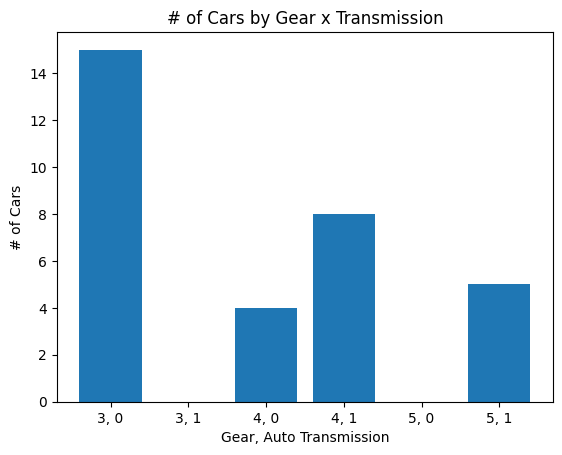

In [8]:
# with pandas cross tab
result = pd.crosstab(df['gear'], df['am'])
print(result)

x = [f"{gear}, {am}" for gear in result.index for am in result.columns]
y = result.values.flatten()

plt.bar(x,y)

plt.title('# of Cars by Gear x Transmission')
plt.xlabel('Gear, Auto Transmission')
plt.ylabel('# of Cars')
plt.show()

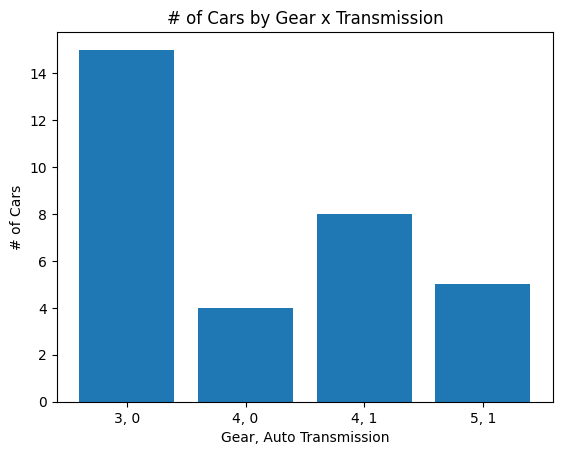

In [9]:
# without crosstab
groupby = df.groupby(['gear', 'am']).size().reset_index(name='count')

x = [f"{gear}, {am}" for gear, am, _ in groupby.values]
y = [count for _, _, count in groupby.values]


plt.bar(x,y)

# make graph with above data
plt.title('# of Cars by Gear x Transmission')
plt.xlabel('Gear, Auto Transmission')
plt.ylabel('# of Cars')
plt.show()


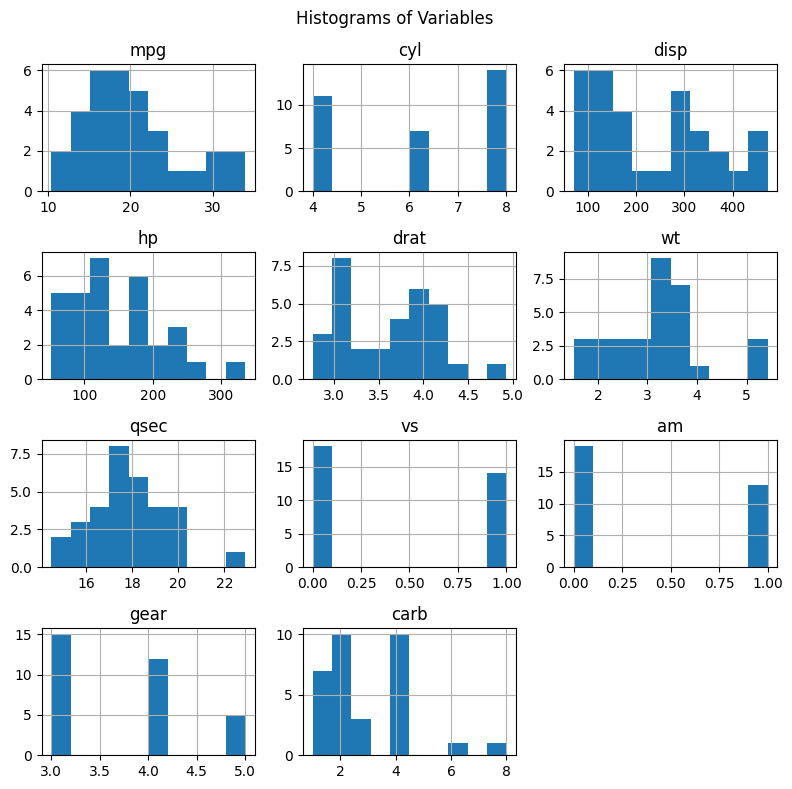

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(8, 8))

for i, column in enumerate(df.columns[1:]):
    ax = axs[i//3, i%3]
    ax.hist(df[column])
    ax.set_title(column)
    ax.grid(True)

fig.delaxes(axs[3, 2])


plt.suptitle('Histograms of Variables')
plt.tight_layout()
plt.show()

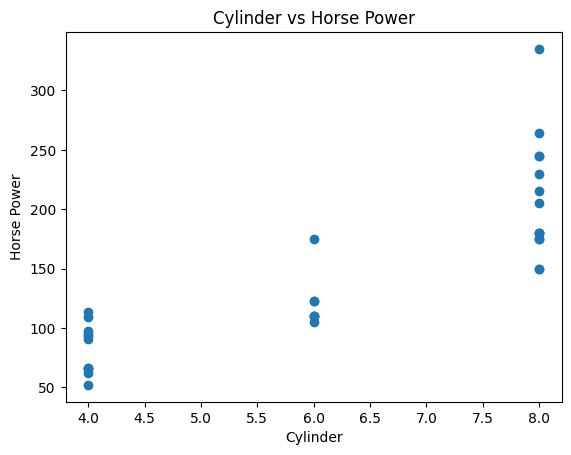

In [11]:

plt.scatter(df['cyl'], df['hp'])
plt.title('Cylinder vs Horse Power')
plt.xlabel('Cylinder')
plt.ylabel('Horse Power')
plt.show()


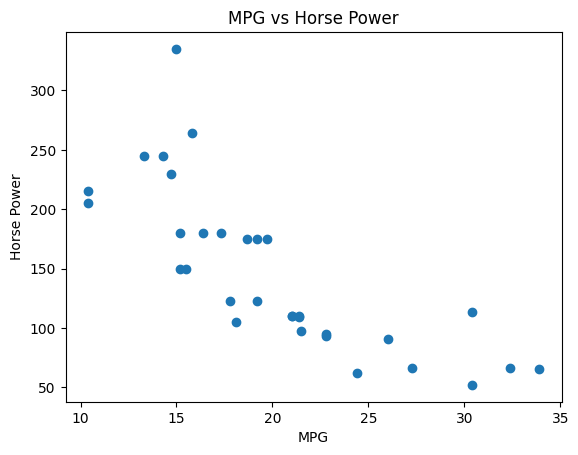

In [12]:

plt.scatter(df['mpg'], df['hp'])
plt.title('MPG vs Horse Power')
plt.xlabel('MPG')
plt.ylabel('Horse Power')
plt.show()


In [13]:
# 각 변수들 간의 상관 관계를 알아 보기 위해 상관계수를 구하는 표를 출력하세요.
print(df.drop(columns=['name']).corr())


           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  

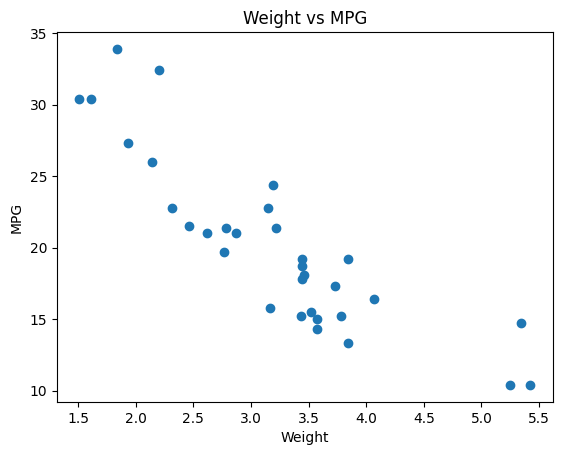

-0.8676593765172281


In [14]:
plt.scatter(df['wt'], df['mpg'])
plt.title('Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

print(df['wt'].corr(df['mpg']))

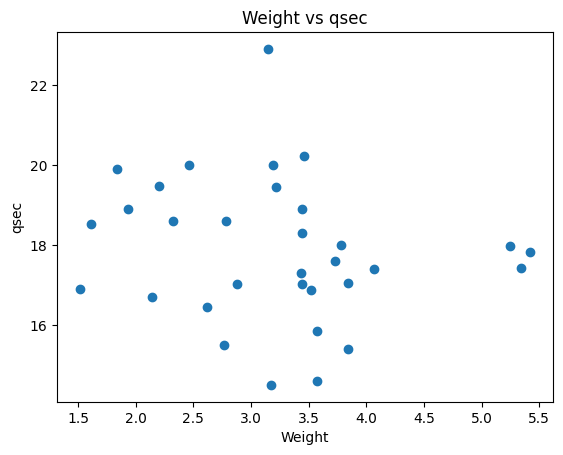

-0.1747158787134049


In [15]:
plt.scatter(df['wt'], df['qsec'])
plt.title('Weight vs qsec')
plt.xlabel('Weight')
plt.ylabel('qsec')
plt.show()

print(df['wt'].corr(df['qsec']))

- 이런 데이터셋을 분석해서 얻을 수 있는 경제적 가치가 무엇일까?, 어떤 비즈니스 상황에서 어떤 경제적 가치를 얻을 수 있을까?
  - 나의 생각
    - M1 활동에서는 지표들간의 상관관계를 찾는 작업을 진행했다.
    - 데이터 분석의 목적이 무엇일까?
      - 좋은 의사결정을 할 수 있는 근거를 마련하기.
        - 좋은 의사결정이란?
          - 의도와 근거가 명확한 결정..? -> 좀 더 생각해보기.
        - 의사결정의 의도: 판매량 증가, 비용 절감, 효율 향상 등등 -> 이것들이 결국엔 경제적 가치로 이어진다.
      - 근거가 있으면 설득할 수 있다.
    - 지표들간의 상관관계를 찾으면 뭐가 좋으냐?
      - 통제가능한 지표를 조절하여 통제불가능한 지표를 조절할 수 있다.
      - 상관관계를 통해 부족한 데이터를 예측할 수 있다.
    - 데이터를 분석하기 전에 목적(=경제적 가치)을 명확히 하는 것이 중요하다.
      - 내가 비즈니스맨이라면 `1. 연도별로 선호하는 자동차 특성`, `2. 나이대별 선호하는 자동차 특성`이 궁금할 것 같다.
        1. 연도별로 선호하는 자동차 특성 
           - 목적: 시장이 변화하는 추세를 파악하고 싶다 -> 이를 바탕으로 선호되는 특성에 맞는 신규 자동차 개발(경제적 가치)
           - 방법: 연도별 판매량 column을 추가로 수집하고 다른 칼럼과 상관관계를 찾아본다.
        2. 나이대별 선호하는 자동차 특성
           - 목적: 나이대별 선호하는 자동차 특성을 파악하고 싶다 -> 나이대별 맞춤 마케팅 전략 수립(경제적 가치)
           - 방법: 나이대/성별 당 판매량 column을 추가로 수집하고 다른 칼럼과 상관관계를 찾아본다.
  - 팀의 생각
    - groupby했던 것 처럼 차량을 여러 카테고리로 분류하여 클러스터링 할 수 있다.
    - 연비, 무게, 마력 등 지표간의 상관관계를 통해 최적화된 차량 설계가 가능하다.
    - 소비자 선호 데이터를 추가하여 마케팅 전략 수립에 도움이 될 수 있다.
  - 종합
    - 팀원들은 현재 데이터를 기준으로, 나는 좀 더 일반적인 차원에서 생각해보았다.
    - 공통적으로 데이터는 현재 상황을 해석하고 미래를 예측하는 근거라고 생각했다.